### Climate Analysis
วิเคราะห์การเปลี่ยนแปลงของสภาพภูมิอากาศในอดีต เช่น อุณหภูมิสูงขึ้น/ลดลง, ปริมาณฝน, ความแปรปรวน ฯลฯ  
ตอบคำถามอะไร: “สภาพภูมิอากาศเปลี่ยนไปอย่างไร?”

### Forecasting
ใช้ข้อมูลและรูปแบบในอดีตเพื่อทำนายแนวโน้มของวันข้างหน้า เช่น พรุ่งนี้อุณหภูมิจะสูงขึ้นหรือลดลง, มีโอกาสฝนตก ฯลฯ  
ตอบคำถามอะไร: “จาก pattern อดีต พรุ่งนี้มีแนวโน้มจะเป็นยังไง?”

### Feature Importance (สำหรับ tree model):

ดูว่าฟีเจอร์ใดมีผลต่อการทำนายมากที่สุด (เช่น lag, rolling, anomaly ฯลฯ)
วิเคราะห์ว่าปัจจัยใดส่งผลต่อ climate change

In [52]:
import pandas as pd

df = pd.read_csv('../Dataset/nasa_power_prepared_data.csv')
df.shape

(16389, 107)

### Analysis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

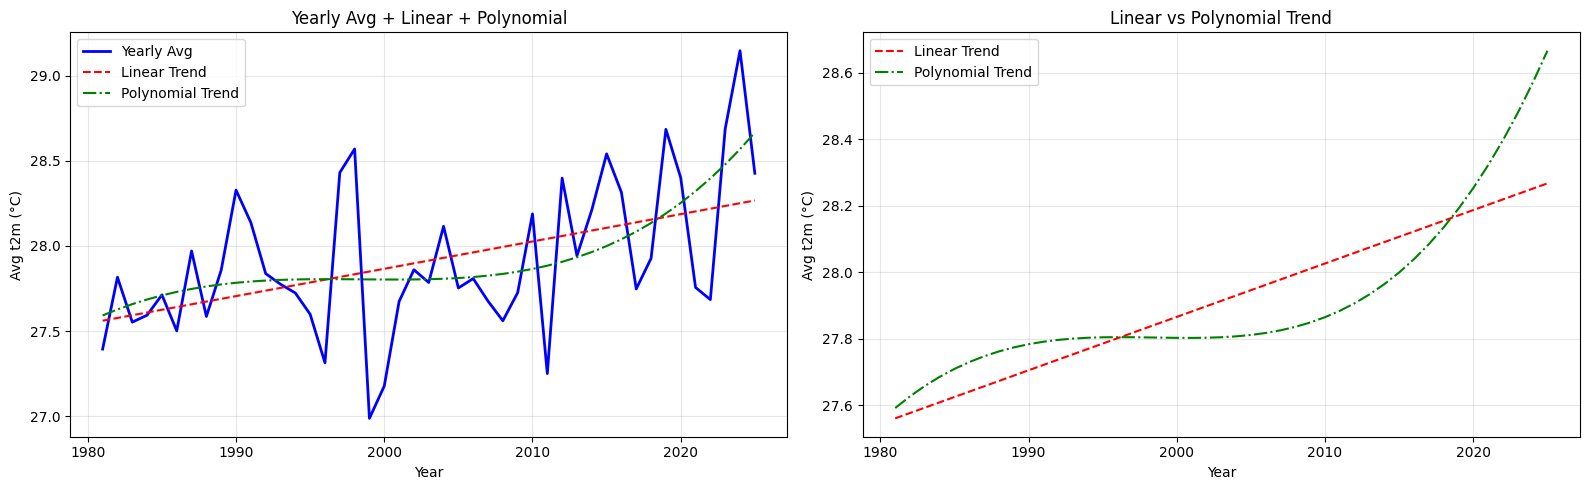

Linear slope: 0.0161 °C/year


In [55]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    yearly_avg = df.groupby('year')['t2m'].mean()
    years = yearly_avg.index.values.reshape(-1, 1)
    temps = yearly_avg.values

    # Linear trend
    model = LinearRegression()
    model.fit(years, temps)
    trend_linear = model.predict(years)

    # Non-linear (Polynomial) trend (degree)
    poly = PolynomialFeatures(degree=10)
    years_poly = poly.fit_transform(years)
    model_poly = LinearRegression()
    model_poly.fit(years_poly, temps)
    trend_poly = model_poly.predict(years_poly)

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))
    # Subplot 1: Yearly Avg + Linear + Polynomial
    axs[0].plot(years, temps, color='blue', linewidth=2, label='Yearly Avg')
    axs[0].plot(years, trend_linear, color='red', linestyle='--', label='Linear Trend')
    axs[0].plot(years, trend_poly, color='green', linestyle='-.', label='Polynomial Trend')
    axs[0].set_title('Yearly Avg + Linear + Polynomial')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel('Avg t2m (°C)')
    axs[0].grid(True, alpha=0.3)
    axs[0].legend()

    # Subplot 2: Linear + Polynomial only
    axs[1].plot(years, trend_linear, color='red', linestyle='--', label='Linear Trend')
    axs[1].plot(years, trend_poly, color='green', linestyle='-.', label='Polynomial Trend')
    axs[1].set_title('Linear vs Polynomial Trend')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Avg t2m (°C)')
    axs[1].grid(True, alpha=0.3)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    print(f'Linear slope: {model.coef_[0]:.4f} °C/year')

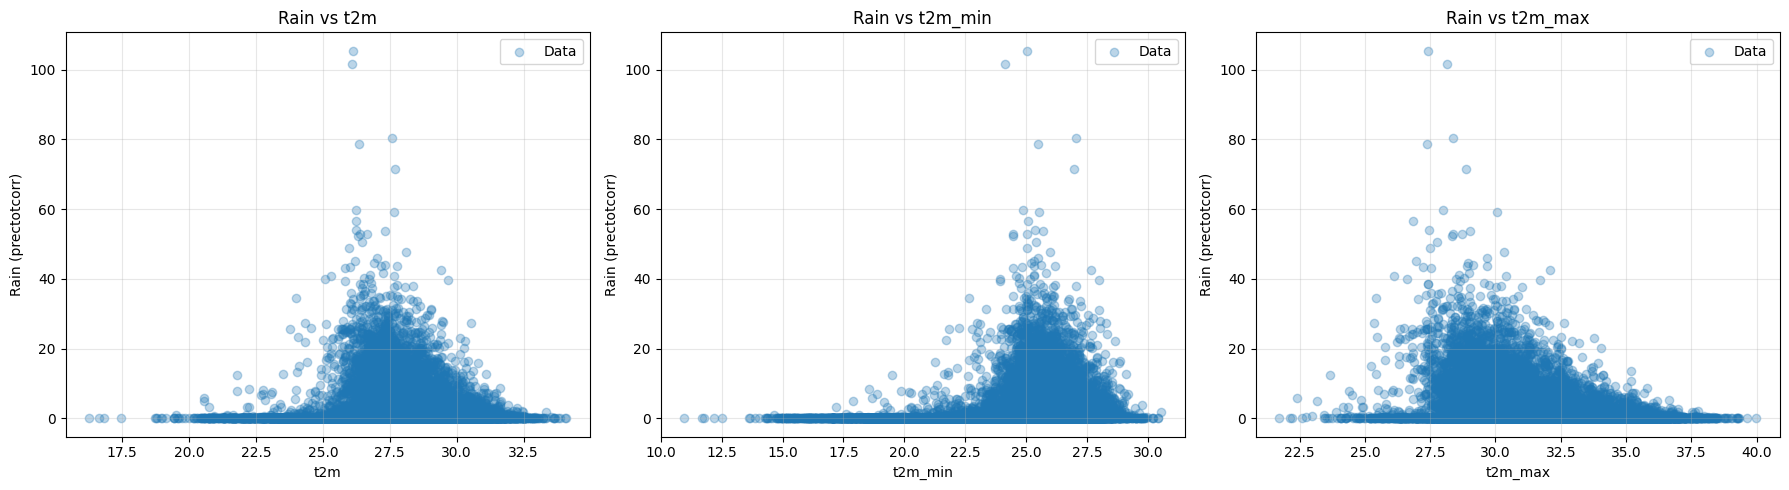

In [83]:
cols = ['t2m', 't2m_min', 't2m_max']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    if col in df.columns and 'prectotcorr' in df.columns:
        X = df[[col]].values.flatten()
        y = df['prectotcorr'].values
        axs[i].scatter(X, y, alpha=0.3, label='Data')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Rain (prectotcorr)')
        axs[i].set_title(f'Rain vs {col}')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)
        
plt.tight_layout()
plt.show()

In [ ]:
features_to_compare = ['t2m', 'gwetprof', 'gwetroot', 'gwettop']
colors = ['black', 'blue', 'green', 'orange']

fig, axes = plt.subplots(4, 1, figsize=(12, 12))

for idx, (feat, color) in enumerate(zip(features_to_compare, colors)):
    if feat in df.columns:
        axes[idx].plot(df['date'], df[feat], color=color, linewidth=1.5)
        axes[idx].set_xlabel('Date', fontsize=10)
        axes[idx].set_ylabel('Value', fontsize=10)
        axes[idx].set_title(f'{feat}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot: ความสัมพันธ์แต่ละฟีเจอร์กับน้ำฝน (prectotcorr)
features_to_compare = ['t2m', 'gwetprof', 'gwetroot', 'gwettop']
fig, axs = plt.subplots(1, 4, figsize=(22, 5))
for i, col in enumerate(features_to_compare):
    if col in df.columns and 'prectotcorr' in df.columns:
        X = df[[col]].values.flatten()
        y = df['prectotcorr'].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='royalblue')
        axs[i].set_xlabel(col, fontsize=12)
        axs[i].set_ylabel('Rain (prectotcorr)', fontsize=12)
        axs[i].set_title(f'Rain vs {col}', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

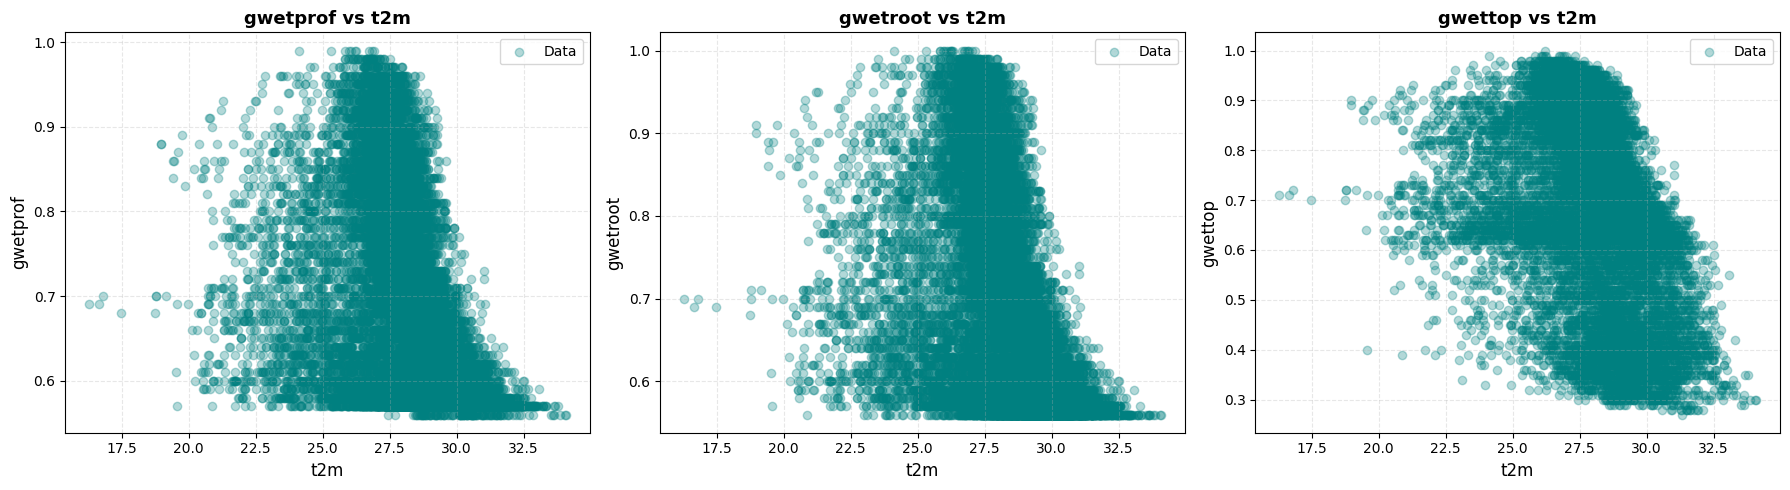

In [102]:
features_to_compare = ['gwetprof', 'gwetroot', 'gwettop']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='teal')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

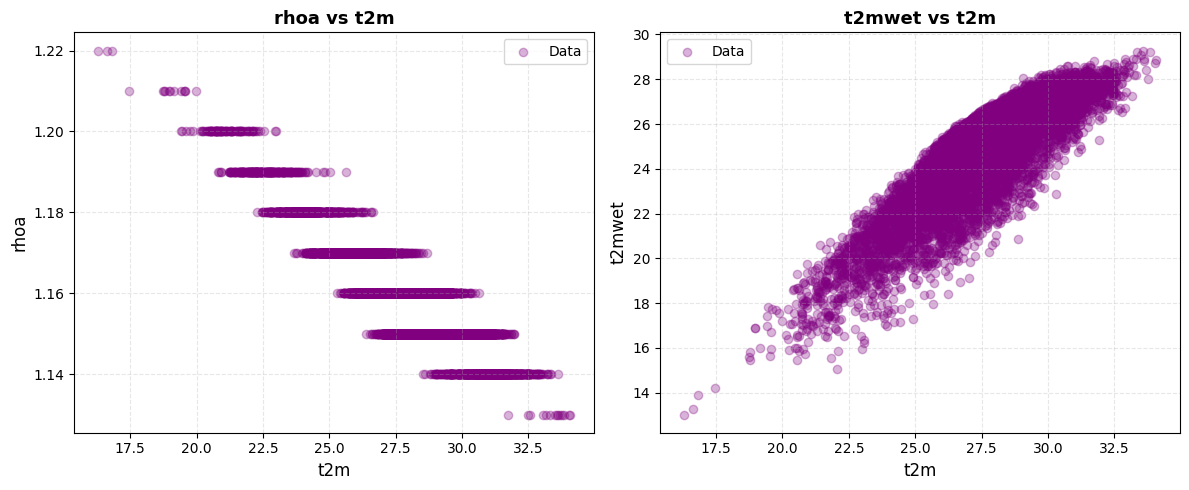

In [103]:
features_to_compare = ['rhoa', 't2mwet']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='purple')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

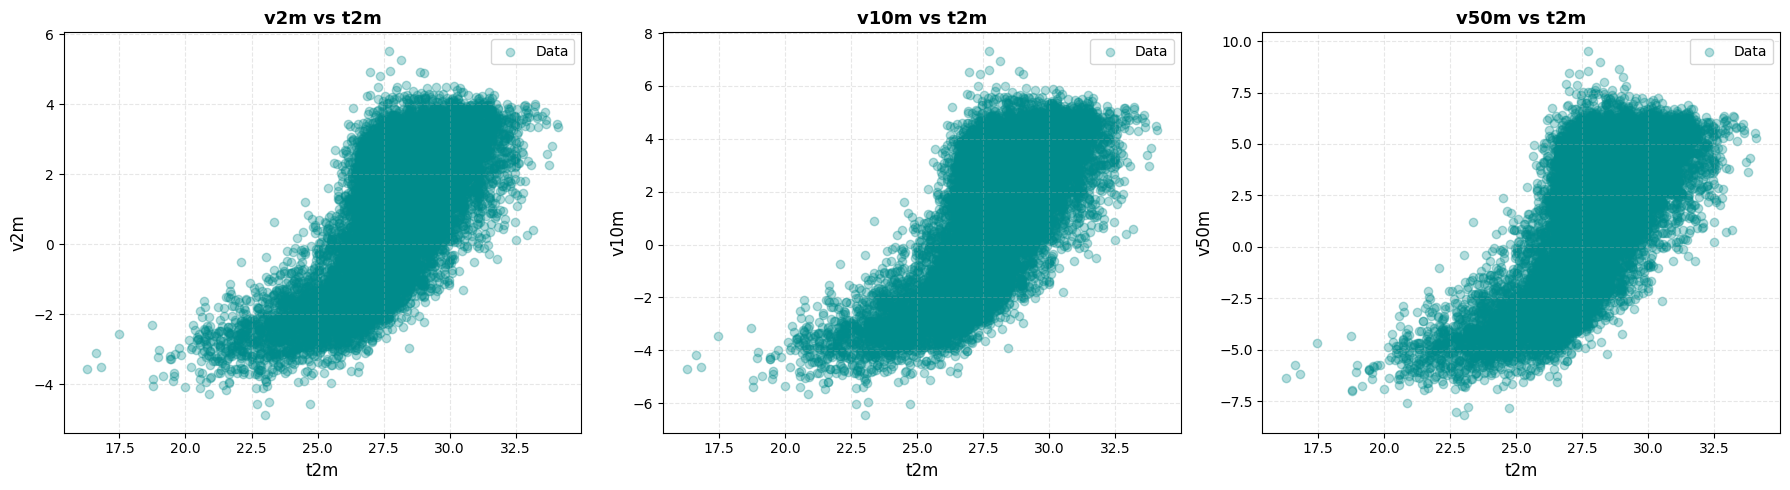

In [104]:
# Scatter plot: v2m, v10m, v50m เทียบกับ t2m
features_to_compare = ['v2m', 'v10m', 'v50m']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='darkcyan')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

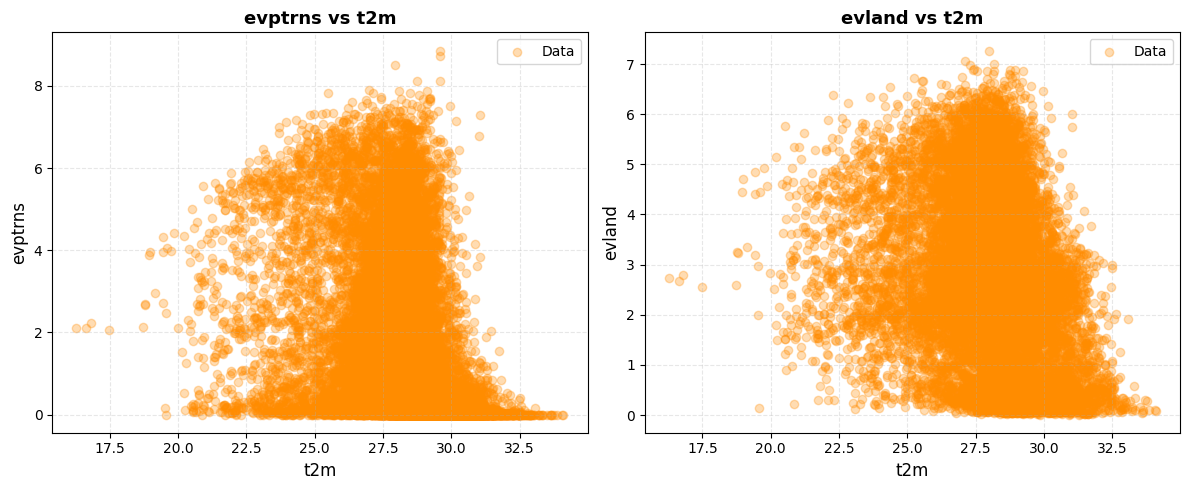

In [107]:
features_to_compare = ['evptrns', 'evland']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, col in enumerate(features_to_compare):
    if 't2m' in df.columns and col in df.columns:
        X = df['t2m'].values
        y = df[col].values
        axs[i].scatter(X, y, alpha=0.3, label='Data', color='darkorange')
        axs[i].set_xlabel('t2m', fontsize=12)
        axs[i].set_ylabel(col, fontsize=12)
        axs[i].set_title(f'{col} vs t2m', fontsize=13, fontweight='bold')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

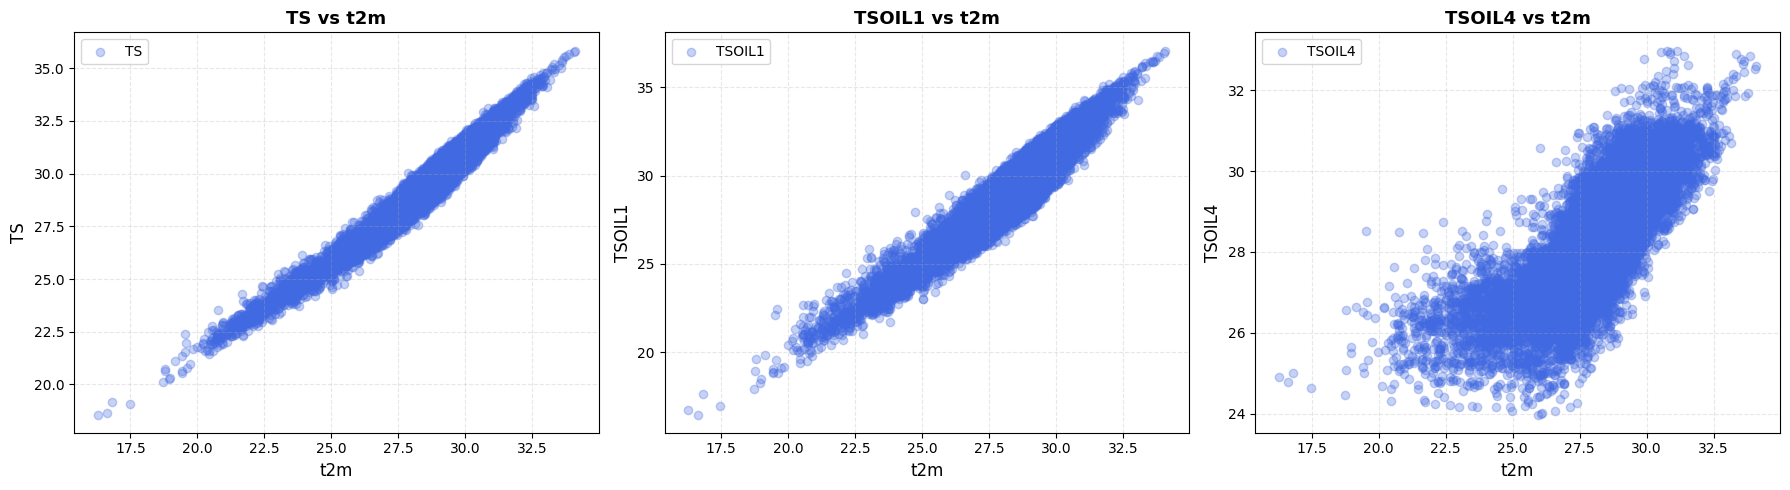

In [113]:
# Scatter plot: TS, TSOIL1, TSOIL4 เทียบกับ t2m
features_to_plot = ['ts', 'tsoil1', 'tsoil4']
labels = ['TS', 'TSOIL1', 'TSOIL4']
plt.figure(figsize=(18, 5))
for i, (feat, label) in enumerate(zip(features_to_plot, labels)):
    if feat in df.columns and 't2m' in df.columns:
        plt.subplot(1, 3, i+1)
        plt.scatter(df['t2m'], df[feat], alpha=0.3, color='royalblue', label=label)
        plt.xlabel('t2m', fontsize=12)
        plt.ylabel(label, fontsize=12)
        plt.title(f'{label} vs t2m', fontsize=13, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()